# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}/weather?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to the API
        response = requests.get(city_url)

        # Parse the JSON response
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | palmer
Processing Record 3 of Set 1 | nova sintra
Processing Record 4 of Set 1 | chonchi
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | shengli
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | medina
Processing Record 11 of Set 1 | kiunga
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | chadron
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | carutapera
Processing Record 19 of Set 1 | bondo
Processing Record 20 of Set 1 | bourbon-lancy
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | adamstown
Processing Record 23 of S

Processing Record 37 of Set 4 | ribeira grande
Processing Record 38 of Set 4 | novyy urengoy
Processing Record 39 of Set 4 | saipan
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | bardai
Processing Record 42 of Set 4 | ocean shores
Processing Record 43 of Set 4 | vorgashor
Processing Record 44 of Set 4 | la'ie
Processing Record 45 of Set 4 | hadibu
Processing Record 46 of Set 4 | den burg
Processing Record 47 of Set 4 | beyneu
Processing Record 48 of Set 4 | prymors'k
Processing Record 49 of Set 4 | olutanga
Processing Record 0 of Set 5 | skhodnya
Processing Record 1 of Set 5 | al mijlad
Processing Record 2 of Set 5 | igarka
Processing Record 3 of Set 5 | vorkuta
Processing Record 4 of Set 5 | lorengau
Processing Record 5 of Set 5 | nguru
Processing Record 6 of Set 5 | illizi
Processing Record 7 of Set 5 | lionel town
Processing Record 8 of Set 5 | san rafael
Processing Record 9 of Set 5 | punta arenas
Processing Record 10 of Set 5 | fauske
Processing Record 11

Processing Record 33 of Set 8 | vung tau
Processing Record 34 of Set 8 | fonte boa
Processing Record 35 of Set 8 | tchintabaraden
Processing Record 36 of Set 8 | colares
Processing Record 37 of Set 8 | nishinoomote
Processing Record 38 of Set 8 | suwayr
Processing Record 39 of Set 8 | grand falls-windsor
Processing Record 40 of Set 8 | thunder bay
Processing Record 41 of Set 8 | chibougamau
Processing Record 42 of Set 8 | barra de santo antonio
Processing Record 43 of Set 8 | las terrenas
Processing Record 44 of Set 8 | itoman
Processing Record 45 of Set 8 | gao
Processing Record 46 of Set 8 | balqash
Processing Record 47 of Set 8 | amqui
Processing Record 48 of Set 8 | sitka
Processing Record 49 of Set 8 | saluzzo
Processing Record 0 of Set 9 | kadugli
Processing Record 1 of Set 9 | ponta delgada
Processing Record 2 of Set 9 | kabansk
Processing Record 3 of Set 9 | altay
Processing Record 4 of Set 9 | salalah
Processing Record 5 of Set 9 | gornozavodsk
Processing Record 6 of Set 9 | h

Processing Record 21 of Set 12 | el granada
Processing Record 22 of Set 12 | manokwari
Processing Record 23 of Set 12 | afif
Processing Record 24 of Set 12 | lensk
Processing Record 25 of Set 12 | cheremukhovo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,279.85,97,100,11.49,TF,1686871308
1,palmer,42.1584,-72.3287,298.93,52,40,4.12,US,1686871245
2,nova sintra,14.8667,-24.7167,294.34,78,34,5.65,CV,1686871327
3,chonchi,-42.6128,-73.8092,277.10,89,6,1.41,CL,1686871306
4,waitangi,-43.9535,-176.5597,284.72,90,94,0.45,NZ,1686871302


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.85,97,100,11.49,TF,1686871308
1,palmer,42.1584,-72.3287,298.93,52,40,4.12,US,1686871245
2,nova sintra,14.8667,-24.7167,294.34,78,34,5.65,CV,1686871327
3,chonchi,-42.6128,-73.8092,277.10,89,6,1.41,CL,1686871306
4,waitangi,-43.9535,-176.5597,284.72,90,94,0.45,NZ,1686871302


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

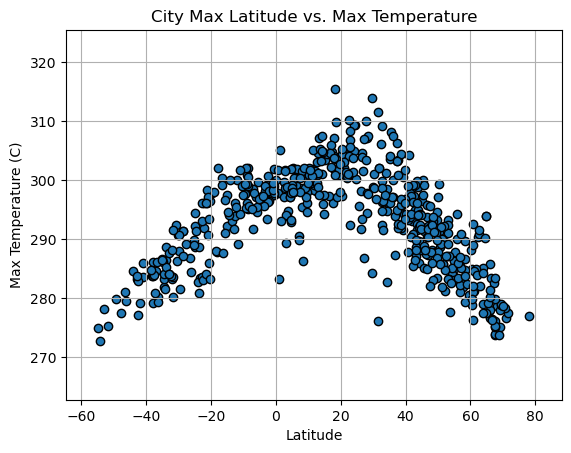

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Max Temperature")

# Incorporate the other graph properties
plt.xlim(min(city_data_df["Lat"]) - 10, max(city_data_df["Lat"]) + 10)
plt.ylim(min(city_data_df["Max Temp"]) - 10, max(city_data_df["Max Temp"]) + 10) 

plt.grid(True)

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 12 

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

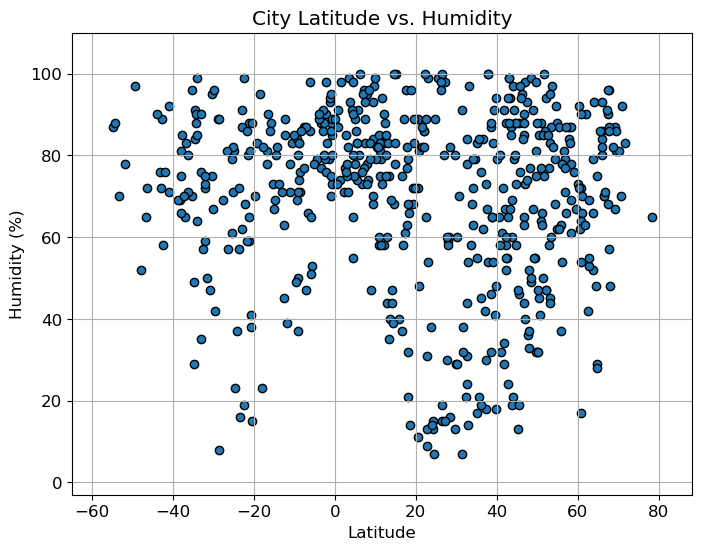

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# Incorporate the other graph properties
plt.xlim(min(city_data_df["Lat"]) - 10, max(city_data_df["Lat"]) + 10)
plt.ylim(min(city_data_df["Humidity"]) - 10, max(city_data_df["Humidity"]) + 10) 

plt.grid(True)
        
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 12 

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

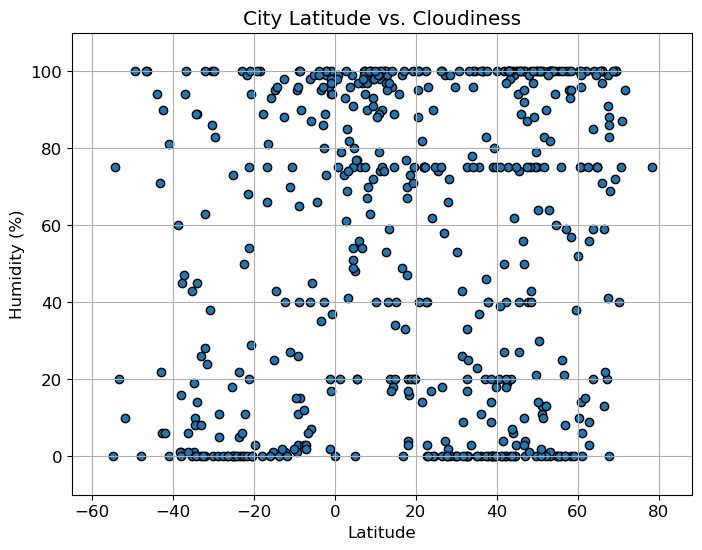

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.xlim(min(city_data_df["Lat"]) - 10, max(city_data_df["Lat"]) + 10)
plt.ylim(min(city_data_df["Cloudiness"]) - 10, max(city_data_df["Cloudiness"]) + 10) 

plt.grid(True)
         
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 12 

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

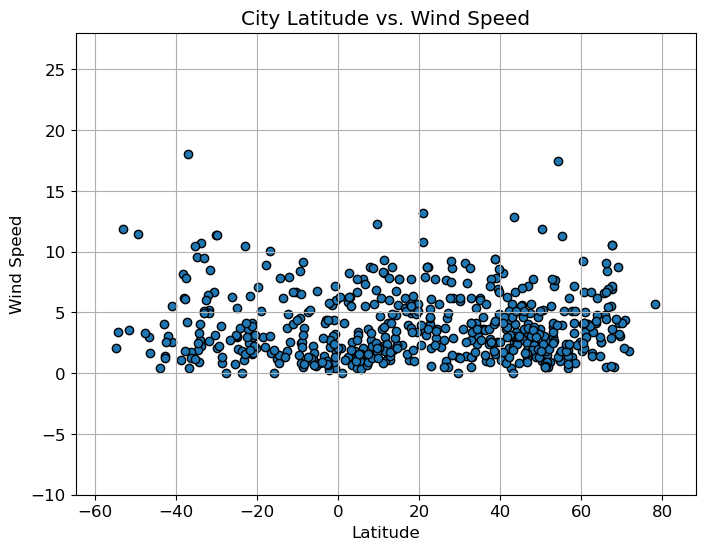

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")

# Incorporate the other graph properties
plt.xlim(min(city_data_df["Lat"]) - 10, max(city_data_df["Lat"]) + 10)
plt.ylim(min(city_data_df["Wind Speed"]) - 10, max(city_data_df["Wind Speed"]) + 10) 

plt.grid(True)
         
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 12 

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
 
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    r_value = f'r-value: {round(rvalue, 2)}'
    plt.annotate(equation, (min(x_values), min(y_values)), fontsize=12, color='red')
    plt.annotate(r_value, (min(x_values), min(y_values) + 10), fontsize=12, color='red')

    plt.savefig(f"{hemisphere}_{title.replace(' ', '_')}.png")


    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,palmer,42.1584,-72.3287,298.93,52,40,4.12,US,1686871245
2,nova sintra,14.8667,-24.7167,294.34,78,34,5.65,CV,1686871327
5,udachny,66.4167,112.4000,283.40,70,59,8.45,RU,1686871333
6,shengli,37.4564,118.4856,303.25,30,46,2.85,CN,1686871581
8,olonkinbyen,70.9221,-8.7187,276.61,92,87,4.38,SJ,1686871305


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,279.85,97,100,11.49,TF,1686871308
3,chonchi,-42.6128,-73.8092,277.10,89,6,1.41,CL,1686871306
4,waitangi,-43.9535,-176.5597,284.72,90,94,0.45,NZ,1686871302
7,blackmans bay,-43.0167,147.3167,283.22,76,71,4.02,AU,1686871315
10,kiunga,-6.1219,141.2906,297.11,98,98,1.15,PG,1686871431


###  Temperature vs. Latitude Linear Regression Plot

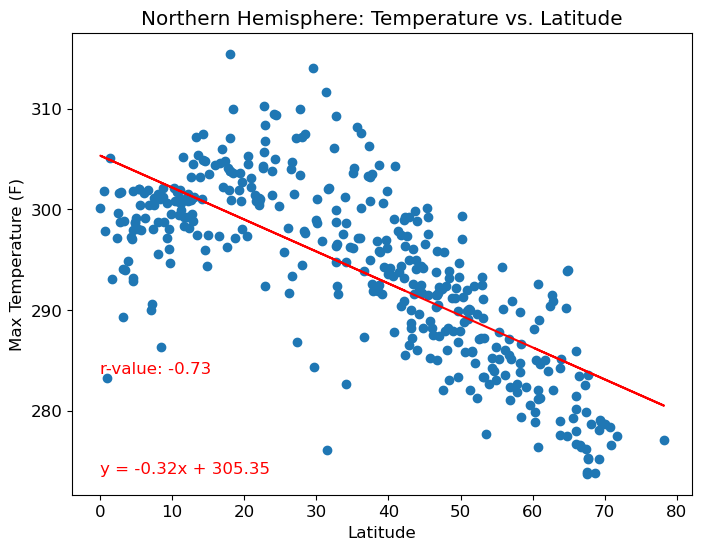

In [15]:
# Linear regression on Northern Hemisphere
create_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Northern Hemisphere: Temperature vs. Latitude", "Northern")

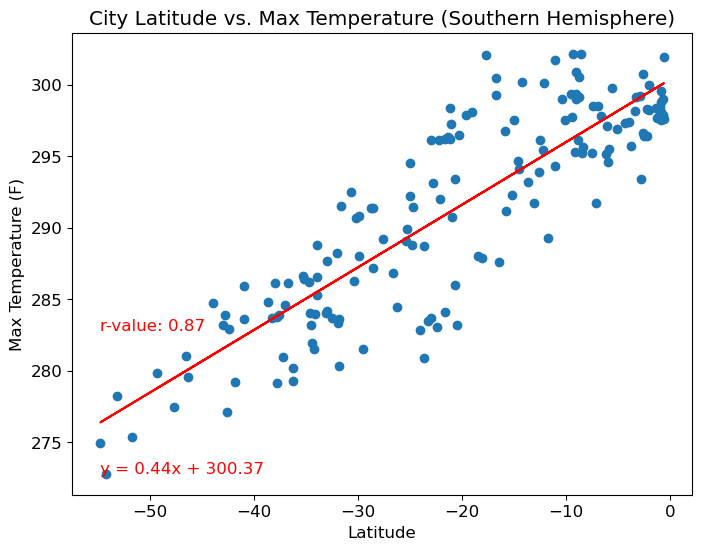

In [16]:
# Linear regression on Southern Hemisphere
create_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "City Latitude vs. Max Temperature (Southern Hemisphere)", "Southern Hemisphere")

**Discussion about the linear relationship:** 
In the Northern Hemisphere, the regression plot between latitute and Max temperature shows a negative relationship. The r-value of -0.72 shows a strong negative correlation. 

In the Southern Hemisphere, the regression plot shows a positive relationship. The r-value of 0.8 shows a strong positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

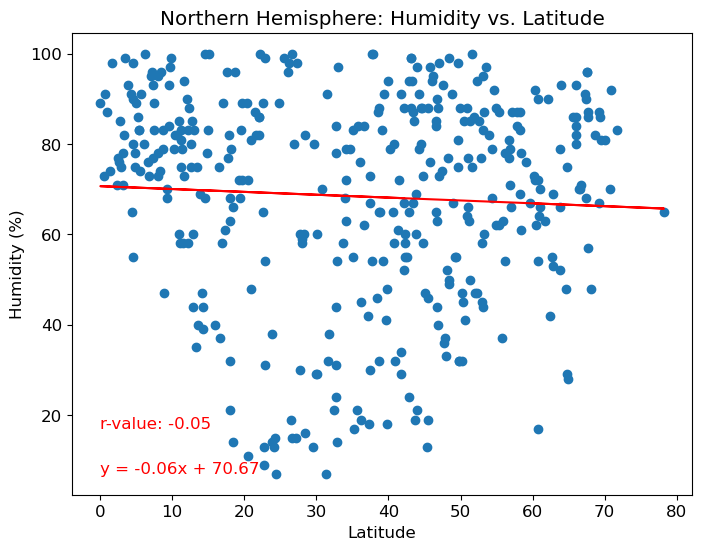

In [17]:
# Northern Hemisphere
create_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere: Humidity vs. Latitude", "Northern")

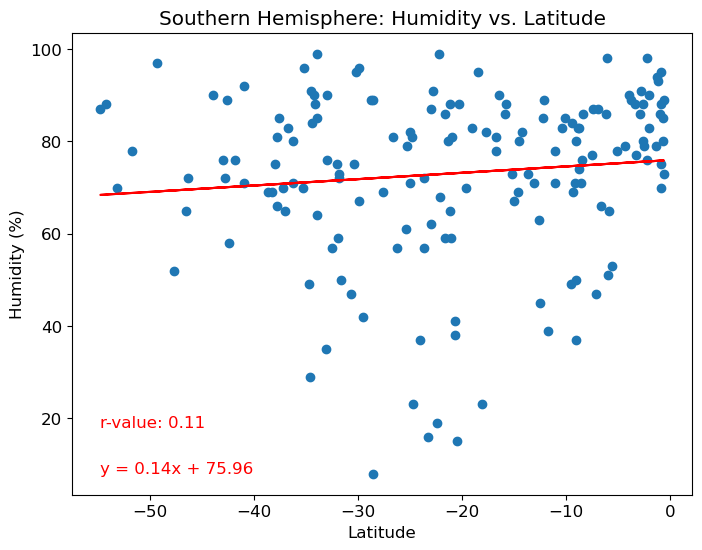

In [18]:
# Southern Hemisphere
create_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere: Humidity vs. Latitude", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

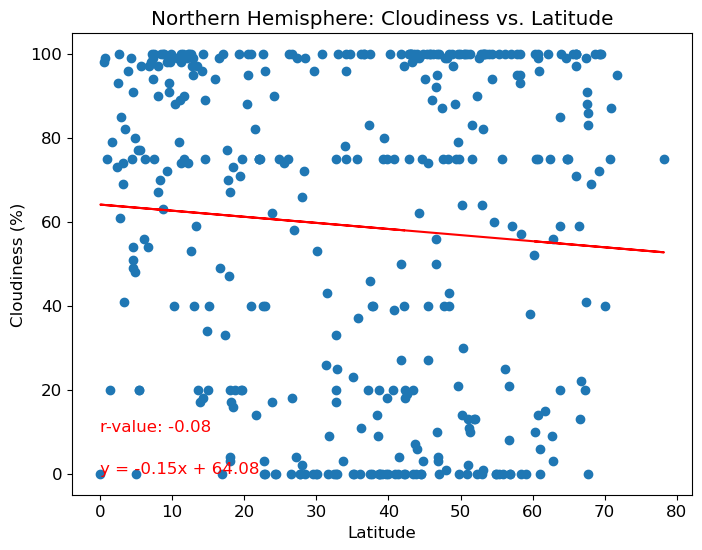

In [19]:
# Northern Hemisphere
create_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere: Cloudiness vs. Latitude", "Northern")

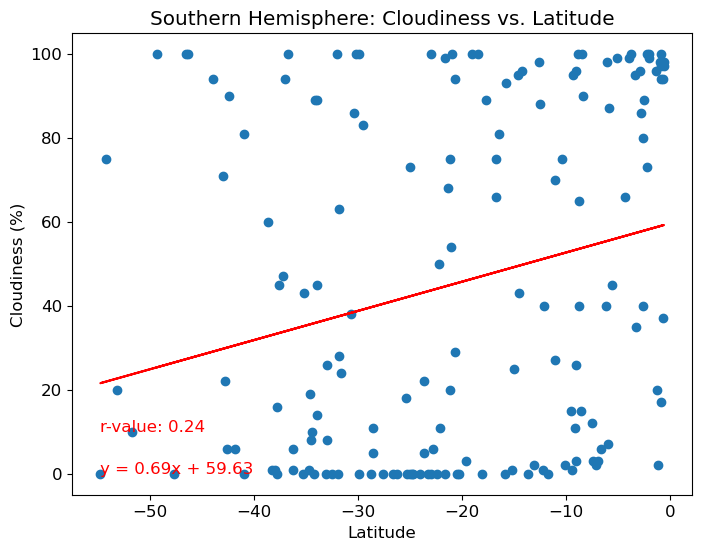

In [20]:
# Southern Hemisphere
create_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere: Cloudiness vs. Latitude", "Southern")

**Discussion about the linear relationship:** In the Northern Hemisphere, the regression plot shows a weak negative relationship between latitude and cloudiness. The r-value of -0.04 suggests a weak negative correlation. Similiarly the Southern Hemisphere, the regression plot also shows a weak negative relationship. The r-value of -0.06 for the southern hemisphere similiarily suggests a very weak negative correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

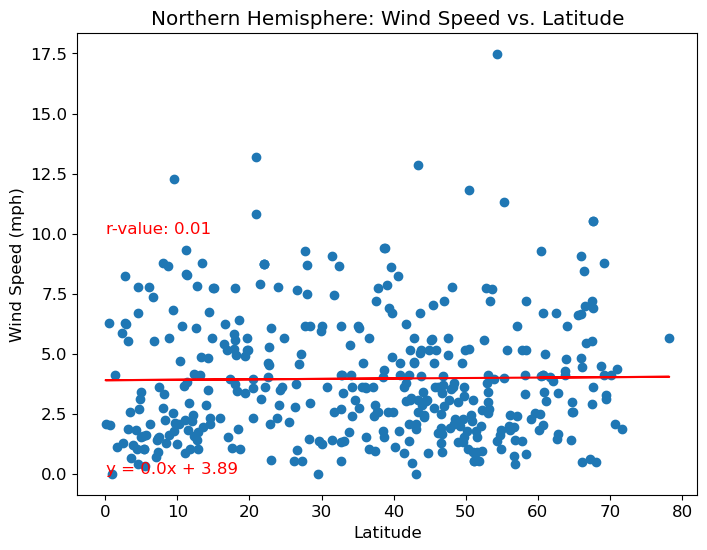

In [21]:
# Northern Hemisphere
create_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere: Wind Speed vs. Latitude", "Northern")


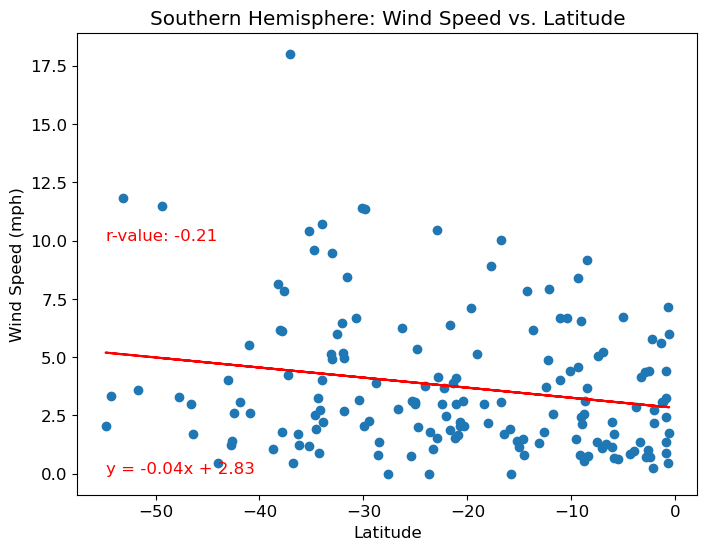

In [22]:
# Southern Hemisphere
create_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere: Wind Speed vs. Latitude", "Southern")

**Discussion about the linear relationship:** In the northern hemisphere, the regression plot shows a very weak negative relationship between latitude and wind speed. The r-value of -0.02 suggests an almost non-existent relationship between the two variables.

Similiarily for the southern hemisphere, the regression plot whos a very weak negative relationship between latitude and wind speed. The r-value of -0.13 even more so suggests no relationship between the two variables. 
